In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

Choose a background style.

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
plt.style.use('seaborn-darkgrid')

Plot the normalized sinus for the evenly-spaced ten values from -10 to 10.

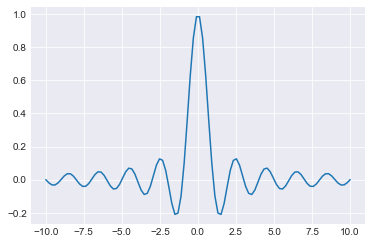

In [4]:
a = np.linspace(-10, 10, 100)
b = np.sinc(a)
plt.plot(a, b)

Load built-in iris dataset and paint the cells based on its strength. Then, plot how the features vary over the dataset.

In [5]:
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)

df = data['data']

In [6]:
df = df.head().style.background_gradient()
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.100000,3.500000,1.400000,0.200000
1,4.900000,3.000000,1.400000,0.200000
2,4.700000,3.200000,1.300000,0.200000
3,4.600000,3.100000,1.500000,0.200000
4,5.000000,3.600000,1.400000,0.200000


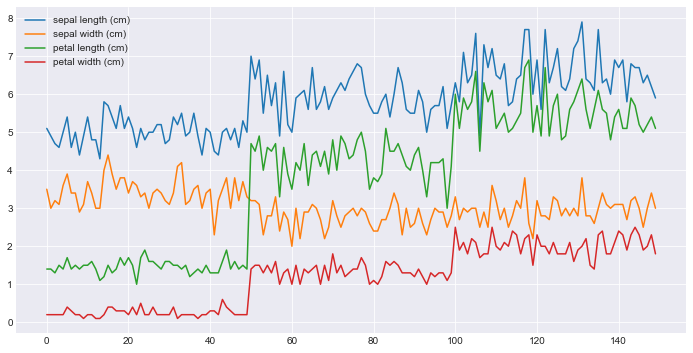

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))

df = data['data']
for i in df.columns:
    ax.plot(df.index, df[i], label=i)
    ax.legend()

Import GOOG, MSFT, and ORCL stock data in 2020.

In [27]:
from pathlib import Path
from urllib.request import urlopen
import pandas as pd

here = Path('C:/Users/Lenovo/Desktop/datasets').absolute().parent
csv_file = here / 'stocks.csv'

dfs = []
symbols = [
    'GOOG',
    'MSFT',
    'ORCL',
]

for sym in symbols:
    print(f'downloading {sym}')
    url = f'https://query1.finance.yahoo.com/v7/finance/download/{sym}'
    url += '?period1=1577836800&period2=1609372800&interval=1d&events=history'
    with urlopen(url) as resp:
        df = pd.read_csv(resp, parse_dates=['Date'])
        df['Symbol'] = sym
        df.insert(1, 'Symbol', df.pop('Symbol'))
        dfs.append(df)
df = pd.concat(dfs)
df.sort_values('Date', inplace=True)
df.to_csv(csv_file, index=False)

downloading GOOG
downloading MSFT
downloading ORCL


In [28]:
df.set_index('Date', inplace=True)
df.head()

,Symbol,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-01-02,GOOG,67.077499,68.406998,67.077499,68.368500,68.368500,28134620
2020-01-02,MSFT,158.779999,160.729996,158.330002,160.619995,156.924377,22622100
2020-01-02,ORCL,53.270000,53.959999,53.230000,53.950001,51.586056,13899600
2020-01-03,GOOG,67.392998,68.625000,67.277184,68.032997,68.032997,23740120
2020-01-03,MSFT,158.320007,159.949997,158.059998,158.619995,154.970413,21116200


Plot the closing prices for MSFT.

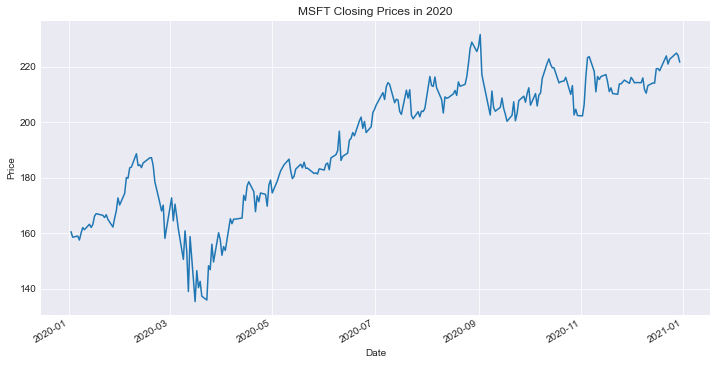

In [13]:
MSFT = df.query('Symbol == "MSFT"')
ax = MSFT['Close'].plot(figsize=(12, 6))
ax.set_ylabel('Price')
ax.set_title('MSFT Closing Prices in 2020');

In what range are the most price values of MSFT clustered ?

<AxesSubplot:ylabel='Density'>

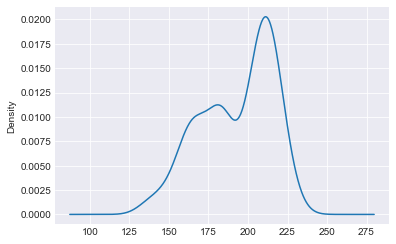

In [14]:
MSFT['Close'].plot.kde()

In [29]:
df

,Symbol,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-01-02,GOOG,67.077499,68.406998,67.077499,68.368500,68.368500,28134620
2020-01-02,MSFT,158.779999,160.729996,158.330002,160.619995,156.924377,22622100
2020-01-02,ORCL,53.270000,53.959999,53.230000,53.950001,51.586056,13899600
2020-01-03,GOOG,67.392998,68.625000,67.277184,68.032997,68.032997,23740120
2020-01-03,MSFT,158.320007,159.949997,158.059998,158.619995,154.970413,21116200
...,...,...,...,...,...,...,...
2020-12-29,GOOG,89.389503,89.622002,87.804497,87.935997,87.935997,25987900
2020-12-29,MSFT,226.309998,227.179993,223.580002,224.149994,221.312576,17403200
2020-12-30,MSFT,225.229996,225.630005,221.470001,221.679993,218.873856,20272300


What are the monthly total volume per company?

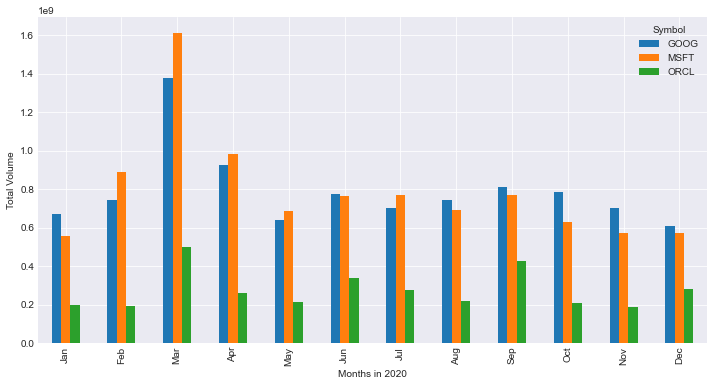

In [47]:
from calendar import month_abbr

df.index.name = 'Months in 2020'
ax = df.pivot(columns='Symbol', values='Volume').resample('M').sum().plot.bar(figsize=(12, 6))
ax.set_xticklabels([month_abbr[i+1] for i in ax.get_xticks()])
ax.set_ylabel('Total Volume');

In [48]:
df.drop(['Month'], axis=1, inplace=True)

In [49]:
df

,Symbol,Open,High,Low,Close,Adj Close,Volume
Months in 2020,,,,,,,
2020-01-02,GOOG,67.077499,68.406998,67.077499,68.368500,68.368500,28134620
2020-01-02,MSFT,158.779999,160.729996,158.330002,160.619995,156.924377,22622100
2020-01-02,ORCL,53.270000,53.959999,53.230000,53.950001,51.586056,13899600
2020-01-03,GOOG,67.392998,68.625000,67.277184,68.032997,68.032997,23740120
2020-01-03,MSFT,158.320007,159.949997,158.059998,158.619995,154.970413,21116200
...,...,...,...,...,...,...,...
2020-12-29,GOOG,89.389503,89.622002,87.804497,87.935997,87.935997,25987900
2020-12-29,MSFT,226.309998,227.179993,223.580002,224.149994,221.312576,17403200
2020-12-30,MSFT,225.229996,225.630005,221.470001,221.679993,218.873856,20272300


Plot the monthly median closing price with each company has its own chart. 

In [50]:
df['Month'] = df.index.month

close_median = df.pivot_table(index='Month', columns='Symbol', values='Close', aggfunc='median')
close_median

Symbol,GOOG,MSFT,ORCL
Month,,,
1,71.959999,163.279999,54.160000
2,74.255501,183.630005,54.720001
3,57.714251,152.125000,47.605000
4,63.123501,171.419998,52.970001
5,68.992001,182.849998,52.699999
6,71.808498,193.905006,54.145000
7,75.729748,206.665001,55.865000
8,75.922501,213.020004,55.279999
9,75.963997,207.259995,59.459999


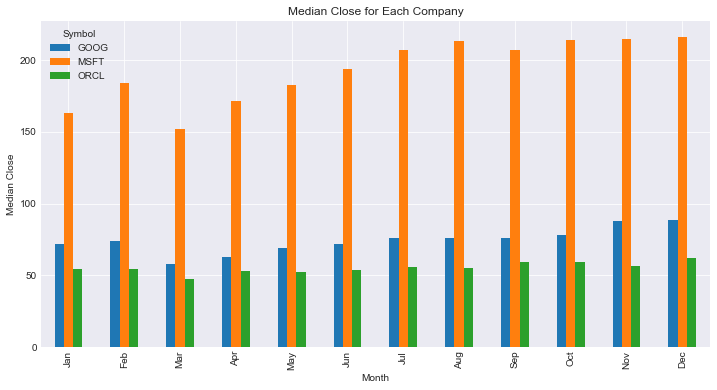

In [51]:
from calendar import month_abbr

ax = close_median.plot.bar(figsize=(12, 6))

ax.set_xticklabels([month_abbr[i+1] for i in ax.get_xticks()])
ax.set_title('Median Close for Each Company')
ax.set_ylabel('Median Close');

How are the median volume varies across the weekdays?

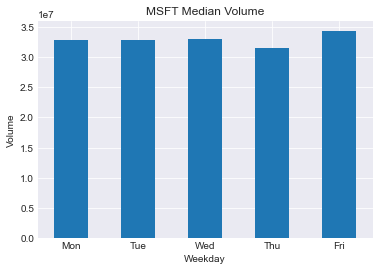

In [52]:
daily = MSFT['Volume'].groupby(MSFT.index.weekday).median()
ax = daily.plot.bar(title='MSFT Median Volume', rot=0)

ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
ax.set_xlabel('Weekday')
ax.set_ylabel('Volume');

### Interactive Charts <br>
Create a normalized sinus plot again we did previously but with an interactive range option this time.

In [53]:
from ipywidgets import interact

@interact(limit=6)
def plot_sin(limit):
    a = np.linspace(-limit, limit, 100)
    b = np.sinc(a)
    plt.plot(a, b)
    plt.show()
    

interactive(children=(IntSlider(value=6, description='limit', max=18, min=-6), Output()), _dom_classes=('widge…

We can adjust min and max value of limit with IntSlider.

In [54]:
from ipywidgets import IntSlider

@interact(limit=IntSlider(min=0, max=20))
def plot_sin(limit):
    a = np.linspace(-limit, limit, 100)
    b = np.sinc(a)
    plt.plot(a, b)

interactive(children=(IntSlider(value=0, description='limit', max=20), Output()), _dom_classes=('widget-intera…

## Plotly

Import a track coordinations dataset from https://raw.githubusercontent.com/LinkedInLearning/python-scientific-stack-3006561/main/Ch08/08_07/track.csv.

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/LinkedInLearning/python-scientific-stack-3006561/main/Ch08/08_07/track.csv', parse_dates=['time'], index_col='time')
df.head()

,lat,lng,height
time,,,
2015-08-20 03:48:07.235,32.519585,35.015021,136.199997
2015-08-20 03:48:24.734,32.519606,35.014954,126.599998
2015-08-20 03:48:25.660,32.519612,35.014871,123.000000
2015-08-20 03:48:26.819,32.519654,35.014824,120.500000
2015-08-20 03:48:27.828,32.519689,35.014776,118.900002


Set the average value of the features for each 3 minutes as the new data frame.

In [56]:
df = df.resample('3min').mean().reset_index()
df.head()

,time,lat,lng,height
0,2015-08-20 03:48:00,32.518362,35.014302,118.770212
1,2015-08-20 03:51:00,32.515354,35.013291,102.634210
2,2015-08-20 03:54:00,32.512950,35.011211,90.783562
3,2015-08-20 03:57:00,32.510759,35.010519,95.747170
4,2015-08-20 04:00:00,32.508786,35.012569,94.824242


How is the height change over time?

In [57]:
import plotly.express as px

fig = px.bar(df, x='time', y='height')
fig

You can also save the figure as an html file and send it to your friends.

In [58]:
fig.write_html('track_height.html')